In [2]:
# Dataset with 14 indicators of Heart Health
# Process:
# 1. Get to know data - Find outliers, find correlations, etc.
# 2. Conduct a hypothesis. Determine which factors I think will most effect chance of heart disease.
# 3. Construct a logistic regression, only include significant variables.
# 4. Test other machine learning methods such as SVM, Random Forest, Etc.
# 5. Conclude results
# 6. Make a prediction with my own personal data

# Dataset: https://www.kaggle.com/ronitf/heart-disease-uci

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# 1. Input data
heart = pd.read_csv('heart.csv')

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
72    29    1   1       130   204    0        0      202      0      0.0   
58    34    1   3       118   182    0        0      174      0      0.0   
125   34    0   1       118   210    0        1      192      0      0.7   
239   35    1   0       126   282    0        0      156      1      0.0   
65    35    0   0       138   183    0        1      182      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
60    71    0   2       110   265    1        0      130      0      0.0   
151   71    0   0       112   149    0        1      125      0      1.6   
129   74    0   1       120   269    0        0      121      1      0.2   
144   76    0   2       140   197    0        2      116      0      1.1   
238   77    1   0       125   304    0        0      162      1      0.0   

     slope  ca  thal  target  
72       2   0     2       1  
58       2   0     2     

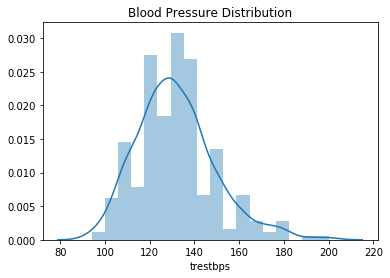

In [4]:
# Check for outliers. Overall the data seems to be normally distrbuted in terms of patient age and blood pressure.
print(heart.sort_values(by='age'))
print(sns.distplot(heart['trestbps']).set_title('Blood Pressure Distribution'))


Text(0.5, 1.0, 'Age Distribution')


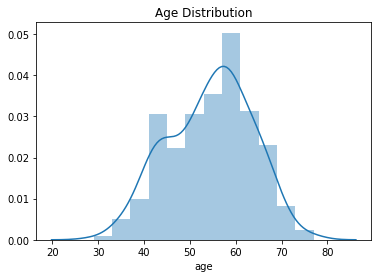

In [5]:
print(sns.distplot(heart['age']).set_title('Age Distribution'))

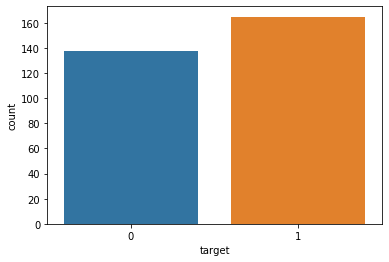

In [6]:
# group 0 has heart disease
sns.countplot(x='target',data=heart)

In [7]:
# General comparison between groups
heart.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [16]:
# look at difference in target
heart.groupby('exang').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal,target
exang,,,,,,,,,,,,,
0,53.754902,0.637255,1.250000,130.799020,243.848039,0.142157,0.553922,155.681373,0.806863,1.509804,0.647059,2.225490,0.696078
1,55.626263,0.777778,0.383838,133.323232,251.242424,0.161616,0.474747,137.212121,1.519192,1.171717,0.898990,2.494949,0.232323


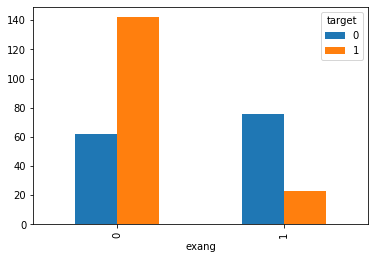

In [17]:
# Going deeper into exercise angia
pd.crosstab(heart.exang,heart.target).plot(kind='bar')

In [15]:
# thal is number of blood vessels colored by flouroscopy
heart.groupby('thal').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
thal,,,,,,,,,,,,,
0,52.500000,0.500000,1.000000,128.000000,210.000000,0.500000,0.500000,135.500000,0.500000,0.500000,1.500000,0.000000,0.500000
1,56.666667,0.944444,0.666667,136.944444,227.000000,0.277778,0.500000,135.111111,0.444444,1.522222,0.944444,1.000000,0.333333
2,53.246988,0.524096,1.216867,129.385542,246.048193,0.120482,0.542169,155.771084,0.186747,0.682530,1.566265,0.524096,0.783133
3,55.632479,0.871795,0.658120,134.042735,250.153846,0.162393,0.512821,143.435897,0.504274,1.481197,1.230769,0.991453,0.239316


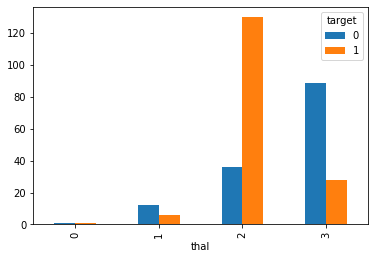

In [18]:
# Going deeper into flouroscopy
# It's unexpected that two vessels showing up results in no heart disease.
pd.crosstab(heart.thal,heart.target).plot(kind='bar')

In [19]:
heart.groupby('sex').mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.12500,0.572917,151.125000,0.229167,0.876042,1.427083,0.552083,2.125000,0.750000
1,53.758454,0.932367,130.946860,239.289855,0.15942,0.507246,148.961353,0.371981,1.115459,1.386473,0.811594,2.400966,0.449275


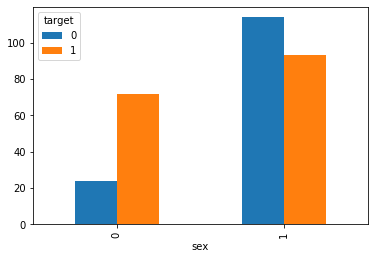

In [20]:
# 1 is male
# females are much less likely to have heart disease
pd.crosstab(heart.sex,heart.target).plot(kind='bar')

In [ ]:
# I think relevant variables with be exang, thal, sex, and age. We will use feature selection algos now

In [28]:
# First, logistic regression to find significant variables
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

heart = pd.read_csv('heart.csv')
X = heart.drop(columns=['target'])
Y = heart['target']

In [36]:
logreg = LogisticRegression()
rfe = RFE(logreg, 4)
rfe = rfe.fit(X, Y)
print(heart.columns.values.tolist())
print(rfe.support_)
print(rfe.ranking_)


['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
[False  True False False False False False False  True False  True  True
 False]
[ 8  1  2  7 10  9  5  6  1  4  1  1  3]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

In [33]:
# Top variables are: sex, cp, oldpeak, ca, thal

# First we will do logit model on all variables
# Top 4 significant variables are sex, cp, thalach, and ca
# Same as RFE except thalach is more significant here. I'll test both models
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
model=logit_model.fit()
print(model.summary2())

Optimization terminated successfully.
         Current function value: 0.351932
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.489     
Dependent Variable: target           AIC:              239.2711  
Date:               2019-12-19 12:01 BIC:              287.5496  
No. Observations:   303              Log-Likelihood:   -106.64   
Df Model:           12               LL-Null:          -208.82   
Df Residuals:       290              LLR p-value:      4.0884e-37
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
age            0.0128    0.0191   0.6701  0.5028  -0.0246   0.0501
sex           -1.6381    0.4519  -3.6250  0.0003  -2.5237  -0.

In [34]:
X_thalach = heart.drop(columns=['target','age','trestbps','chol','fbs','restecg','exang','oldpeak','slope','thal'])
logit_model=sm.Logit(Y,X_thalach)
model=logit_model.fit()
print(model.summary2())
# We took out significant variables and thus lost some of our R^2. We should add in more variables to this model

Optimization terminated successfully.
         Current function value: 0.474066
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.312     
Dependent Variable: target           AIC:              295.2841  
Date:               2019-12-19 12:05 BIC:              310.1390  
No. Observations:   303              Log-Likelihood:   -143.64   
Df Model:           3                LL-Null:          -208.82   
Df Residuals:       299              LLR p-value:      4.5372e-28
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
sex       -1.7191     0.3348   -5.1354   0.0000   -2.3752   -1.0630
cp         0.8750     0.1564    5.5953   0.0000    0.5685 

In [38]:
# I'll run the model will all variables from the original with a p < .05
X_significant = heart.drop(columns=['target','age','trestbps','chol','fbs','restecg','slope'])
logit_model=sm.Logit(Y,X_significant)
model=logit_model.fit()
print(model.summary2())
# Our model only lost a small amount of it's prediction power, while keeping the most significant variables.

Optimization terminated successfully.
         Current function value: 0.368664
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.465     
Dependent Variable: target           AIC:              237.4102  
Date:               2019-12-19 12:09 BIC:              263.4063  
No. Observations:   303              Log-Likelihood:   -111.71   
Df Model:           6                LL-Null:          -208.82   
Df Residuals:       296              LLR p-value:      3.2094e-39
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
sex       -1.3898     0.4051   -3.4311   0.0006   -2.1837   -0.5959
cp         0.7861     0.1743    4.5094   0.0000    0.4444 

In [42]:
# Test accuracy of logistic regression model
# First we create our test, train sets.
# Then create the model with our training data

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_significant, Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
#Find accuracy, two methods

# with numpy:
y_pred = logreg.predict(X_test)
pred_percent = (np.sum(y_pred==y_test)/91)*100
print(pred_percent, '% were calculated correctly')

# with sklearn:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

79.12087912087912 % were calculated correctly
Accuracy of logistic regression classifier on test set: 0.79


In [79]:
# Lets view the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)
print(confusion_mat[0][0]+confusion_mat[1][1], 'Correct predictions, and', 
      confusion_mat[1][0]+confusion_mat[0][1], 'Incorrect Predictions')
# 79% accuracy is nothing to scoff at. Let's see how our more complex ML algorithms compare.

[[31 13]
 [ 6 41]]
72 Correct predictions, and 19 Incorrect Predictions


In [99]:
# First I will map a random forest to the data
# https://www.datacamp.com/community/tutorials/random-forests-classifier-python
from sklearn.ensemble import RandomForestClassifier

# Create RF, get y prediction
forest = RandomForestClassifier(max_depth=4)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred_forest)

# Our Random forest performs about the same as our logistic regression, 1% worse.

Accuracy: 0.7802197802197802


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[33, 11],
       [ 6, 41]])

In [100]:
# Lets try a support vector machine
# https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

# 81% average, which is the best one but not by much.

[[32 12]
 [ 6 41]]
              precision    recall  f1-score   support

           0       0.84      0.73      0.78        44
           1       0.77      0.87      0.82        47

    accuracy                           0.80        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



In [ ]:
# Overall I implemented three different classification methods: Logistic Regression, Random Forest, and SVM
# They all had pretty similar outcomes on prediciton power.